## Titanic Challenge

In [1]:
# Importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
# importing the train dataset
df1 = pd.read_csv(train_path)

# importing the test dataset
df2 = pd.read_csv(test_path)

# And let's check how the data looks like!
df1.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
440,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,F.C.C. 13529,26.2500,NaN,S
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,29108,11.5000,NaN,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
492,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [4]:
# Creating a list of the 2 dataframes so we perform operations on both
dfs = [df1, df2]

# Intializing the output dataframe
output = df2[['PassengerId']]

### Data Cleaning

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# Checking missing values
print(df1.isnull().sum())
print('-' * 20)
print(df2.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
# Addressing missing values
for df in dfs:
    
    # Let's drop the Cabin and some unnecessary attributes
    df.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1, inplace=True)
    
    # Filling Embarked with the mode
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    
    # Filling Fare with the median
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


For __Age__ we might be able to use a regression model to predict the missing ages, let's first do some feature engineering

### Feature Engineering

In [8]:
for df in dfs:
    # Let's create a family size attribute based on SibSp and Parch
    df['FamilySize'] = df['SibSp'].astype('int') + df['Parch'].astype('int') + 1
    
    # Now based on family size, we might be able to check if the person is alone
    df['IsAlone'] = (df['FamilySize'] == 1).astype('int')
    
    # Based on the name we might be able to check the title
    df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr


In [9]:
df1['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Ms                1
Mme               1
Capt              1
the Countess      1
Don               1
Sir               1
Jonkheer          1
Lady              1
Name: Title, dtype: int64

In [10]:
# Let's call "Other" every Title that is not our top 4
top_5_titles = df1['Title'].value_counts().head(4).index.tolist()

for df in dfs:
    df['Title'] = df['Title'].apply(lambda x: x if x in top_5_titles else 'Other')
    
df1['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

In [11]:
df1.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
157,0,3,"Corn, Mr. Harry",male,30.0,0,0,8.050,S,1,1,Mr
196,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,7.750,Q,1,1,Mr
614,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,8.050,S,1,1,Mr
723,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,13.000,S,1,1,Mr
92,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,61.175,S,2,0,Mr


## Defining the missing Ages

Now let's get back to the __Age__ estimator

In [12]:
# Let's get a copy of the dataset only with given ages
df_age = df1[df1['Age'].notna()]
df_age.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64

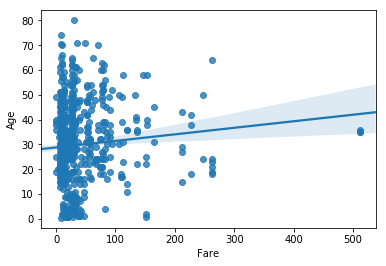

In [13]:
# Let's first check the correlation between Age and Fare
sns.regplot(x='Fare', y='Age', data=df_age)

Clearly not!

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


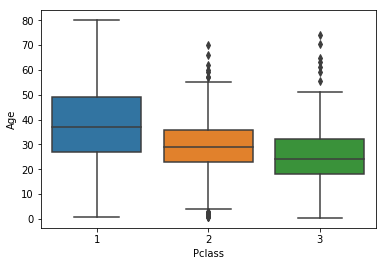

In [14]:
# Let's see Pclass
sns.boxplot(x='Pclass', y='Age', data=df_age)

That is a possible predictor, in genereal the greater the Pclass the younger people are!

            FamilySize       Age
FamilySize    1.000000 -0.301914
Age          -0.301914  1.000000


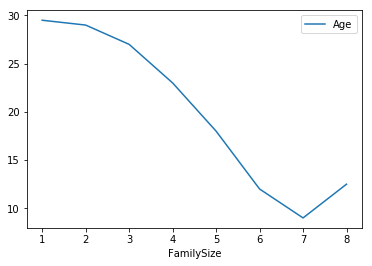

In [15]:
# And FamilySize?
print(df_age[['FamilySize', 'Age']].corr())
df_age[['FamilySize', 'Age']].groupby('FamilySize').median().plot()

There is a bit of a correlation here!

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


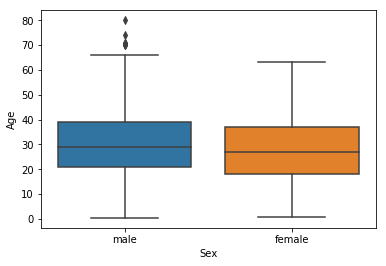

In [16]:
# How about sex?
sns.boxplot(x=df_age['Sex'], y=df_age['Age'])

Not helpful!

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


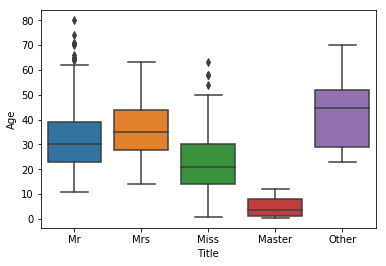

In [17]:
# Finally Title
sns.boxplot(x=df_age['Title'], y=df_age['Age'])

That might help!

In [18]:
# Defing X matrix and target y for Age regression
X_age = df_age[['Pclass', 'FamilySize']]
y_age = df_age['Age']

age_dummies = pd.get_dummies(df_age[['Title']])
age_dummies.drop(columns=['Title_Other'], inplace=True)

X_age = pd.concat([X_age, age_dummies], axis=1)
X_age.head()

,Pclass,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,3,2,0,0,1,0
1,1,2,0,0,0,1
2,3,1,0,1,0,0
3,1,2,0,0,0,1
4,3,1,0,0,1,0


In [19]:
# Let's split the dataset into train and test so we can evaluate the performance of our age predictor
from sklearn.model_selection import train_test_split

X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X_age.values, y_age, test_size=0.2, random_state=4)

In [20]:
# Let's check how a multiple linear regression fits our data
from sklearn.linear_model import LinearRegression
age_predictor = LinearRegression().fit(X_age_train, y_age_train)

yhat_age_test = age_predictor.predict(X_age_test)

from sklearn.metrics import r2_score
print('R2 Score: %.2f' % r2_score(y_age_test, yhat_age_test))
print('Variance score: %.2f' % age_predictor.score(X_age_train, y_age_train))

R2 Score: 0.48
Variance score: 0.38


Although a R2 score of ~0.4 is not really great, it is still a better prediction than averaging all of our missing ages

In [21]:
# Let's train the predictor model now with the full set
age_predictor = LinearRegression().fit(X_age.values, y_age)
age_predictor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predicting Ages

In [22]:
# First let's add the Title dummies
df1 = pd.concat([df1, pd.get_dummies(df1[['Title']])], axis=1)
df2 = pd.concat([df2, pd.get_dummies(df2[['Title']])], axis=1)
dfs = [df1, df2]

for df in dfs:
    # Let's delete the last dummy
    df.drop(columns=['Title_Other'], inplace=True)
    
    # Now let's make the prediction column
    df['PredictedAge'] = age_predictor.predict(df[['Pclass', 'FamilySize', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs']].values)
    
    # And replace the missing values with the predicted ones
    df['Age'].fillna(df['PredictedAge'].round(0), inplace=True)
    
    # Finally, we don't need the predicted column any longer
    df.drop(columns=['PredictedAge'], inplace=True)
    
df1.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,0,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,0,0,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,0,1,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,0,0,1,0
5,0,3,"Moran, Mr. James",male,29.0,0,0,8.4583,Q,1,1,Mr,0,0,1,0


In [23]:
# Checking missing values
print(df1.isnull().sum())
print('-' * 20)
print(df2.isnull().sum())

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
FamilySize      0
IsAlone         0
Title           0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
dtype: int64
--------------------
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
FamilySize      0
IsAlone         0
Title           0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
dtype: int64


## Exploratory Data Analysis

In [24]:
# First let's finish cleaning our data
for df in dfs:
    # Let's get rid of the name column
    df.drop(columns=['Name'], inplace=True)

df1.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs
763,1,1,female,36.0,1,2,120.0000,S,4,0,Mrs,0,0,0,1
289,1,3,female,22.0,0,0,7.7500,Q,1,1,Miss,0,1,0,0
420,0,3,male,29.0,0,0,7.8958,C,1,1,Mr,0,0,1,0
754,1,2,female,48.0,1,2,65.0000,S,4,0,Mrs,0,0,0,1
656,0,3,male,29.0,0,0,7.8958,S,1,1,Mr,0,0,1,0


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


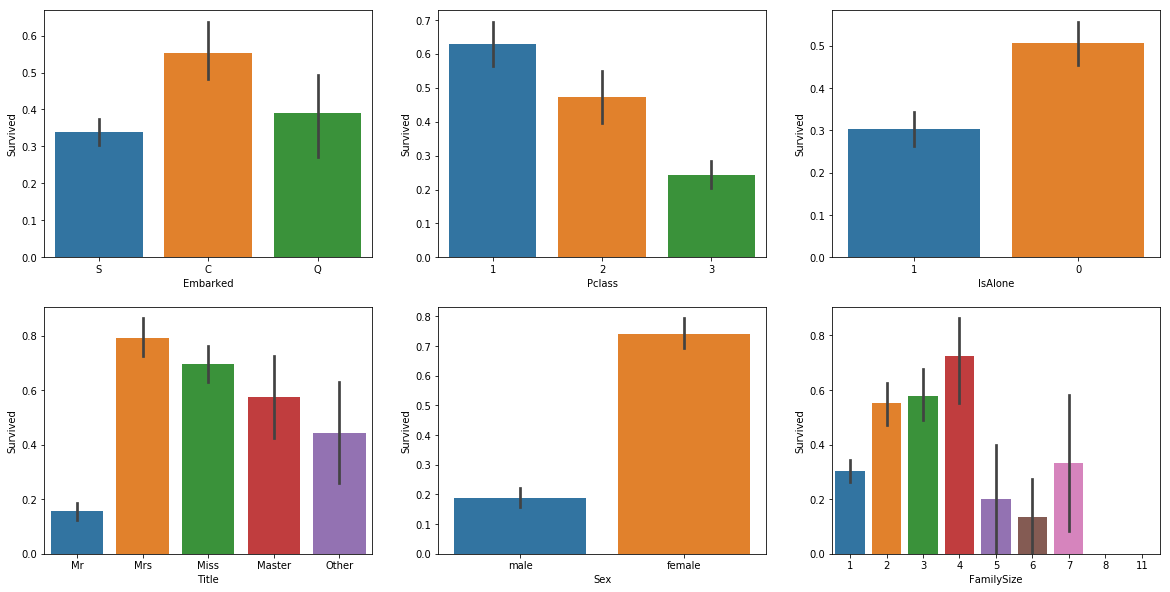

In [25]:
# Now let's see how some features influentes on survival
fig, ax0 = plt.subplots(2, 3,figsize=(20,10))

sns.barplot(x = 'Embarked', y = 'Survived', data=df1, ax = ax0[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=df1, ax = ax0[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=df1, ax = ax0[0,2])

sns.barplot(x = 'Title', y = 'Survived', data=df1, ax = ax0[1,0])
sns.barplot(x = 'Sex', y = 'Survived', data=df1, ax = ax0[1,1])
sns.barplot(x = 'FamilySize', y = 'Survived', data=df1, ax = ax0[1,2])

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


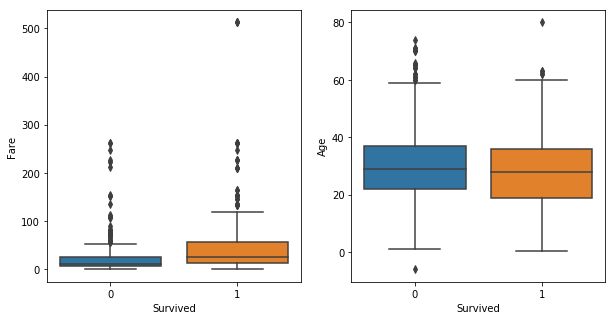

In [26]:
# Let's check Age and Fare
fig1, ax1 = plt.subplots(1, 2,figsize=(10,5))

sns.boxplot(x = 'Survived', y = 'Fare', data=df1, ax = ax1[0])
sns.boxplot(x = 'Survived', y = 'Age', data=df1, ax = ax1[1])

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


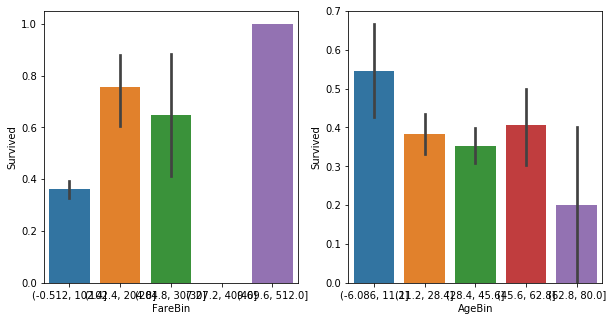

In [27]:
# Perhaps for Age and Fare we might have a bettr understanding if we split into bins
df1_bins = df1[['Age', 'Fare', 'Survived']]
df1_bins['AgeBin'] = pd.cut(df1_bins['Age'].astype('int'), 5)
df1_bins['FareBin'] = pd.cut(df1_bins['Fare'].astype('int'), 5)

fig2, ax2 = plt.subplots(1, 2,figsize=(10,5))

sns.barplot(x = 'FareBin', y = 'Survived', data=df1_bins, ax = ax2[0])
sns.barplot(x = 'AgeBin', y = 'Survived', data=df1_bins, ax = ax2[1])

### Preparing the data for the model

In [28]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0,3,male,22.0,1,0,7.2500,S,2,0,Mr,0,0,1,0
1,1,1,female,38.0,1,0,71.2833,C,2,0,Mrs,0,0,0,1
2,1,3,female,26.0,0,0,7.9250,S,1,1,Miss,0,1,0,0
3,1,1,female,35.0,1,0,53.1000,S,2,0,Mrs,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,1,Mr,0,0,1,0


In [29]:
# Now let's set the matrix of features of df1
X = df1[['Pclass', 'Sex', 'Age', 'Embarked', 'IsAlone', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs']]
X_dummies = pd.get_dummies(X[['Sex', 'Embarked']])
X = pd.concat([X, X_dummies], axis=1)
X.drop(columns=['Sex', 'Embarked', 'Sex_male', 'Embarked_S'], inplace=True)

# Now let's set the matrix of features of df2
X_pred = df2[['Pclass', 'Sex', 'Age', 'Embarked', 'IsAlone', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs']]
X_pred_dummies = pd.get_dummies(X_pred[['Sex', 'Embarked']])
X_pred = pd.concat([X_pred, X_pred_dummies], axis=1)
X_pred.drop(columns=['Sex', 'Embarked', 'Sex_male', 'Embarked_S'], inplace=True)

X.head()

,Pclass,Age,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Sex_female,Embarked_C,Embarked_Q
0,3,22.0,0,0,0,1,0,0,0,0
1,1,38.0,0,0,0,0,1,1,1,0
2,3,26.0,1,0,1,0,0,1,0,0
3,1,35.0,0,0,0,0,1,1,0,0
4,3,35.0,1,0,0,1,0,0,0,0


In [30]:
# And the dependent vector
y = df1['Survived']

In [31]:
# Let's scale the X matrix
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_pred = scaler.transform(X_pred)
X[0:5]

array([[ 0.82737724, -0.54434789, -1.2316449 , -0.21680296, -0.50665528,
         0.85053175, -0.4039621 , -0.73769513, -0.48204268, -0.30756234],
       [-1.56610693,  0.63248309, -1.2316449 , -0.21680296, -0.50665528,
        -1.17573506,  2.47547975,  1.35557354,  2.0745051 , -0.30756234],
       [ 0.82737724, -0.25014015,  0.81192233, -0.21680296,  1.97372855,
        -1.17573506, -0.4039621 ,  1.35557354, -0.48204268, -0.30756234],
       [-1.56610693,  0.41182728, -1.2316449 , -0.21680296, -0.50665528,
        -1.17573506,  2.47547975,  1.35557354, -0.48204268, -0.30756234],
       [ 0.82737724,  0.41182728,  0.81192233, -0.21680296, -0.50665528,
         0.85053175, -0.4039621 , -0.73769513, -0.48204268, -0.30756234]])

In [32]:
# Finally before actually building the prediction model, let's split df1 into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Logistic Regression Classifier

In [33]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Let's find the parameters for the model
num_cs = 100
params = {'solvers': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'Cs' : np.linspace(0.01, 1.0, num_cs).tolist()}
evals = np.zeros((num_cs, 5))

for solv in params['solvers']:
    for c in params['Cs']:
        log = LogisticRegression(C=c, solver=solv).fit(X_train,y_train)
        log_yhat=log.predict(X_test)
        evals[params['Cs'].index(c), params['solvers'].index(solv)] = metrics.accuracy_score(y_test, log_yhat)

In [34]:
# Getting the optimal parameters
max_eval_index = np.unravel_index(evals.argmax(), evals.shape)
solv_opt = params['solvers'][max_eval_index[1]]
c_opt = params['Cs'][max_eval_index[0]]

# Bulding model now with optimal parameters
log = LogisticRegression(C=c_opt, solver=solv_opt).fit(X_train, y_train)
log

LogisticRegression(C=0.63, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
log_yhat = log.predict(X_test)
log_yhat_prob = log.predict_proba(X_test)

In [36]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss

print('Log Loss: %.2f' % log_loss(y_test, log_yhat_prob))
print('Jaccard: %.2f' % jaccard_similarity_score(y_test, log_yhat))
print (classification_report(y_test, log_yhat))

Log Loss: 0.41
Jaccard: 0.83
             precision    recall  f1-score   support

          0       0.86      0.85      0.86       110
          1       0.77      0.78      0.78        69

avg / total       0.83      0.83      0.83       179



## K Nearest Neighbor(KNN)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Let's find the best k for the model
K_range = 11
accuracies = np.zeros((K_range-1))
for n in range(1,K_range):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    neigh_yhat=neigh.predict(X_test)
    accuracies[n-1] = metrics.accuracy_score(y_test, neigh_yhat)
accuracies

array([ 0.75418994,  0.79888268,  0.83240223,  0.84357542,  0.84916201,
        0.84916201,  0.83240223,  0.83798883,  0.82681564,  0.81564246])

In [38]:
# Building the model for the optmal K and getting its scores
# Finding best K
K_opt = accuracies.tolist().index(accuracies.max()) + 1
# Bulding the optimal model
neigh = KNeighborsClassifier(n_neighbors = K_opt).fit(X_train, y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
neigh_yhat = neigh.predict(X_test)

In [40]:
print('Jaccard: %.2f' % jaccard_similarity_score(y_test, neigh_yhat))
print (classification_report(y_test, neigh_yhat))

Jaccard: 0.85
             precision    recall  f1-score   support

          0       0.85      0.91      0.88       110
          1       0.84      0.75      0.79        69

avg / total       0.85      0.85      0.85       179



## Support Vector Machine

In [41]:
from sklearn import svm

# Let's find the parameters for the model
num_cs = 100
params = {'kernels': ['linear', 'poly', 'rbf', 'sigmoid'],
          'Cs' : np.linspace(0.01, 1.0, num_cs).tolist()}
evals = np.zeros((num_cs, 4))

for kern in params['kernels']:
    for c in params['Cs']:
        sv = svm.SVC(C=c, kernel=kern).fit(X_train,y_train)
        sv_yhat=log.predict(X_test)
        evals[params['Cs'].index(c), params['kernels'].index(kern)] = metrics.accuracy_score(y_test, sv_yhat)

In [42]:
# Getting the optimal parameters
max_eval_index = np.unravel_index(evals.argmax(), evals.shape)
kern_opt = params['kernels'][max_eval_index[1]]
c_opt = params['Cs'][max_eval_index[0]]

# Bulding model now with optimal parameters
sv = svm.SVC(C=c_opt, kernel=kern_opt).fit(X_train, y_train)
sv

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
sv_yhat = sv.predict(X_test)

In [44]:
print('Jaccard: %.2f' % jaccard_similarity_score(y_test, sv_yhat))
print (classification_report(y_test, sv_yhat))

Jaccard: 0.79
             precision    recall  f1-score   support

          0       0.84      0.82      0.83       110
          1       0.72      0.75      0.74        69

avg / total       0.80      0.79      0.79       179



## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Let's find the best accuracy evaluation for the model
crits = ['entropy', 'gini']
evals = [0, 0]

for i, criterion in enumerate(crits):
    tree = DecisionTreeClassifier(criterion=criterion).fit(X_train, y_train)
    tree_yhat=tree.predict(X_test)
    evals[i] = metrics.accuracy_score(y_test, tree_yhat)
evals

[0.7988826815642458, 0.79329608938547491]

In [46]:
crit_opt = crits[evals.index(max(evals))]
# Bulding model with optimal parameters
tree = DecisionTreeClassifier(criterion=crit_opt).fit(X_train, y_train)
tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
tree_yhat = tree.predict(X_test)

In [48]:
print('Jaccard: %.2f' % jaccard_similarity_score(y_test, tree_yhat))
print (classification_report(y_test, tree_yhat))

Jaccard: 0.80
             precision    recall  f1-score   support

          0       0.81      0.87      0.84       110
          1       0.77      0.68      0.72        69

avg / total       0.80      0.80      0.80       179



## Random Forest Classifier

In [49]:
from sklearn import ensemble

# Let's find the parameters for the model
num_est = 20
params = {'crits': ['gini', 'entropy'],
          'est' : np.linspace(10, 200, num_est).tolist()}
evals = np.zeros((num_est, 2))

for crit in params['crits']:
    for est in params['est']:
        forest = ensemble.RandomForestClassifier(n_estimators=int(est), criterion=crit).fit(X_train,y_train)
        forest_yhat=forest.predict(X_test)
        evals[params['est'].index(est), params['crits'].index(crit)] = metrics.accuracy_score(y_test, forest_yhat)

In [50]:
# Getting the optimal parameters
max_eval_index = np.unravel_index(evals.argmax(), evals.shape)
crit_opt = params['crits'][max_eval_index[1]]
est_opt = int(params['est'][max_eval_index[0]])

# Bulding model now with optimal parameters
forest = ensemble.RandomForestClassifier(n_estimators=est_opt, criterion=crit_opt).fit(X_train,y_train)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
forest_yhat = forest.predict(X_test)

In [52]:
print('Jaccard: %.2f' % jaccard_similarity_score(y_test, forest_yhat))
print (classification_report(y_test, forest_yhat))

Jaccard: 0.82
             precision    recall  f1-score   support

          0       0.83      0.88      0.85       110
          1       0.79      0.71      0.75        69

avg / total       0.81      0.82      0.81       179



## Optimal Model

In [53]:
from sklearn.metrics import f1_score

all_metrics = {'LogisticRegression': [jaccard_similarity_score(y_test, log_yhat), f1_score(y_test, log_yhat), log_loss(y_test, log_yhat_prob)],
               'KNN': [jaccard_similarity_score(y_test, neigh_yhat), f1_score(y_test, neigh_yhat), np.nan],
               'SVM': [jaccard_similarity_score(y_test, sv_yhat), f1_score(y_test, sv_yhat), np.nan],
               'DecisionTree': [jaccard_similarity_score(y_test, tree_yhat), f1_score(y_test, tree_yhat), np.nan],
               'RandomForest': [jaccard_similarity_score(y_test, forest_yhat), f1_score(y_test, forest_yhat), np.nan]}

df_metrics = pd.DataFrame(all_metrics, index=['Jaccard', 'F1', 'LogLoss'])
df_metrics

,DecisionTree,KNN,LogisticRegression,RandomForest,SVM
Jaccard,0.798883,0.849162,0.826816,0.815642,0.793296
F1,0.723077,0.793893,0.776978,0.748092,0.737589
LogLoss,NaN,NaN,0.414376,NaN,NaN


In [54]:
# Bulding the optimal model with full dataset
best_model = KNeighborsClassifier(n_neighbors = K_opt).fit(X, y)
best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [55]:
yhat = best_model.predict(X_pred)
yhat[0:5]

array([0, 0, 0, 1, 1])

In [56]:
output['Survived'] = yhat
print(output.shape)
output.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [57]:
output.to_csv('titanic-output.csv', index=None)